In [1]:
import matplotlib.pyplot as plt
import torch

from pytorch3d.structures import (
    Pointclouds,
    Meshes,
)

import torch
from pytorch3d.ops import sample_points_from_meshes
from pytorch3d.io import load_obj
from pytorch3d.structures import (
    Pointclouds,
    Meshes,
)
from pytorch3d.renderer import TexturesVertex
from src.renderer import Renderer
from argparse import Namespace

In [2]:
# Set the cuda device
device = torch.device("cuda:0")
torch.cuda.set_device(device)



# Load the obj and ignore the textures and materials.
verts, faces_idx, _ =  load_obj("./data/teapot.obj")
faces = faces_idx.verts_idx

# Initialize each vertex to be white in color.
verts_rgb = torch.ones_like(verts)[None] # (1, V, 3)
textures =  TexturesVertex(verts_features=verts_rgb.to(device))

# Create a Meshes object for the teapot. Here we have only one mesh in the batch
teapot_mesh = Meshes(
    verts=[verts.to(device)],
    faces=[faces.to(device)],
    textures=textures,
)


n_points = 1000000
vertices, normals = sample_points_from_meshes(teapot_mesh, 
    n_points, return_normals=True)

vertices =  vertices[0].to(device)
normals =  normals[0].to(device)

rgb = torch.ones((n_points, 4), device=device) - 0.3

point_cloud = Pointclouds(points=[vertices], 
                          normals=[normals],
                          features=[rgb])

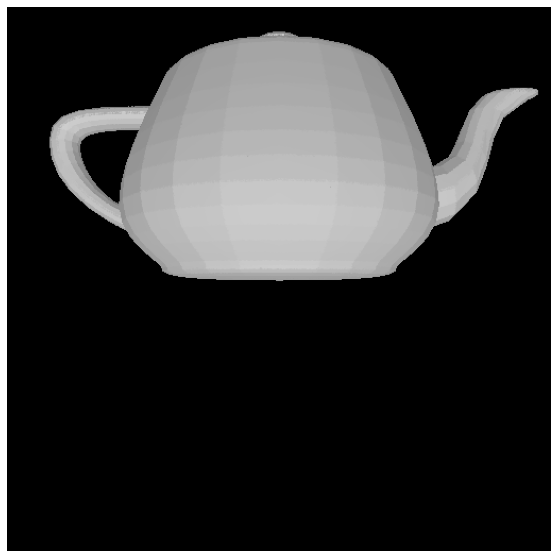

In [12]:
# Select the viewpoint using spherical angles
distance = 2 # Distance from camera to the objectlights = PointLights(device=device, location=[[0.0, -1.0, 3.0]])
elevation = 0. # angle of elevation in degrees
azimuth = 0.0 # No rotation so the camera is positioned on the +Z axis
viewpoint = Namespace(distance=distance, 
                      elevation=elevation, 
                      azimuth=azimuth)

lights = Namespace(location=[[0.0, -1.0, 3.0]])

raster = Namespace(image_size=512, 
                   radius=0.006,
                   points_per_pixel=4)

renderer = Renderer(device, viewpoint, lights, raster)
renderer

images =  renderer(point_cloud)
plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.grid("off")
plt.axis("off");